In [2]:
import tensorflow as tf
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

# Importing Libraries

In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os.path as op
import pickle

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model,Sequential,load_model
from keras.layers import Input, Embedding
from keras.layers import Dense, Bidirectional
from keras.layers.recurrent import LSTM
import keras.metrics as metrics
import itertools
from tensorflow.python.keras.utils.data_utils import Sequence
from decimal import Decimal
from keras import backend as K
from keras.layers import Conv1D,MaxPooling1D,Flatten,Dense

# Data Fetching

In [14]:
inp=pd.read_csv("PJ sensor.csv",usecols=[6,7,10,11])
out=pd.read_csv("PJ sensor.csv",usecols=[2,3,4,5,8,9])

In [15]:
inp.head(5)

,Temperature,Relative Humidity,date,Time
0,31,65,191213,175844
1,31,65,191213,175904
2,31,65,191213,175924
3,31,65,191213,175944
4,31,66,191213,180004


In [16]:
out.head(5)

,NO2,O3,CO,SO2,PM2.5,PM10
0,-15.075377,35.714286,1766.233766,148.484848,11.229150,17.323938
1,-20.100503,41.208791,1733.766234,142.424242,9.413914,24.967407
2,-15.075377,43.956044,1711.038961,136.363636,10.350110,56.781536
3,0.000000,57.692308,1688.311688,139.393939,10.488765,30.371115
4,-20.100503,54.945055,1681.818182,130.303030,12.353048,188.026886


In [17]:
inp=np.array(inp)
out=np.array(out)

# Min Max Scaler

In [18]:
from sklearn.preprocessing import MinMaxScaler
import warnings
scaler_obj=MinMaxScaler()
X1=scaler_obj.fit_transform(inp)
Y1=scaler_obj.fit_transform(out)

warnings.filterwarnings(action='ignore', category=UserWarning)

X1=X1[:,np.newaxis,:]
Y1=Y1[:,np.newaxis,:]

In [19]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [20]:
Y1.shape

(1627533, 1, 6)

# Model

In [21]:
model1 = Sequential()
model1.add(keras.Input(shape=(1,4)))
model1.add(tf.keras.layers.LSTM(6,activation="relu",use_bias=True,kernel_initializer="glorot_uniform",bias_initializer="zeros"))
model1.add(Dense(6))
model1.add(keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,
                                beta_initializer="zeros",gamma_initializer="ones",
                                moving_mean_initializer="zeros",moving_variance_initializer="ones",trainable=True))
model1.add(keras.layers.ReLU())
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='mse',metrics=['accuracy','mse','mae',rmse])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 6)                 264       
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 batch_normalization_1 (Batc  (None, 6)                24        
 hNormalization)                                                 
                                                                 
 re_lu_1 (ReLU)              (None, 6)                 0         
                                                                 
Total params: 330
Trainable params: 318
Non-trainable params: 12
_________________________________________________________________


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.25, random_state=42)

model_fit8 = model1.fit(x_train,y_train,batch_size=2048,epochs=300, validation_split=0.1)

Epoch 1/300
537/537 [==============================] - 124s 214ms/step - loss: 0.1052 - accuracy: 0.3546 - mse: 0.1052 - mae: 0.1911 - rmse: 0.2729 - val_loss: 0.0637 - val_accuracy: 0.4197 - val_mse: 0.0637 - val_mae: 0.1639 - val_rmse: 0.2388
Epoch 2/300
537/537 [==============================] - 114s 213ms/step - loss: 0.0958 - accuracy: 0.3733 - mse: 0.0958 - mae: 0.1822 - rmse: 0.2605 - val_loss: 0.0899 - val_accuracy: 0.3897 - val_mse: 0.0900 - val_mae: 0.1765 - val_rmse: 0.2524
Epoch 3/300
537/537 [==============================] - 113s 211ms/step - loss: 0.0877 - accuracy: 0.3952 - mse: 0.0877 - mae: 0.1751 - rmse: 0.2502 - val_loss: 0.0832 - val_accuracy: 0.4100 - val_mse: 0.0832 - val_mae: 0.1708 - val_rmse: 0.2438
Epoch 4/300
537/537 [==============================] - 113s 211ms/step - loss: 0.0802 - accuracy: 0.4173 - mse: 0.0802 - mae: 0.1689 - rmse: 0.2409 - val_loss: 0.0761 - val_accuracy: 0.4347 - val_mse: 0.0761 - val_mae: 0.1651 - val_rmse: 0.2351
Epoch 5/300
537/537 

537/537 [==============================] - 111s 207ms/step - loss: 0.0153 - accuracy: 0.7527 - mse: 0.0153 - mae: 0.0612 - rmse: 0.0915 - val_loss: 0.0150 - val_accuracy: 0.7526 - val_mse: 0.0150 - val_mae: 0.0606 - val_rmse: 0.0906
Epoch 35/300
537/537 [==============================] - 115s 214ms/step - loss: 0.0147 - accuracy: 0.7673 - mse: 0.0147 - mae: 0.0596 - rmse: 0.0888 - val_loss: 0.0145 - val_accuracy: 0.7676 - val_mse: 0.0145 - val_mae: 0.0590 - val_rmse: 0.0880
Epoch 36/300
537/537 [==============================] - 117s 217ms/step - loss: 0.0143 - accuracy: 0.7819 - mse: 0.0143 - mae: 0.0580 - rmse: 0.0863 - val_loss: 0.0140 - val_accuracy: 0.7847 - val_mse: 0.0140 - val_mae: 0.0573 - val_rmse: 0.0852
Epoch 37/300
537/537 [==============================] - 116s 216ms/step - loss: 0.0138 - accuracy: 0.7981 - mse: 0.0138 - mae: 0.0566 - rmse: 0.0840 - val_loss: 0.0137 - val_accuracy: 0.8007 - val_mse: 0.0137 - val_mae: 0.0562 - val_rmse: 0.0834
Epoch 38/300
537/537 [=======

537/537 [==============================] - 111s 207ms/step - loss: 0.0084 - accuracy: 0.9121 - mse: 0.0084 - mae: 0.0411 - rmse: 0.0587 - val_loss: 0.0083 - val_accuracy: 0.9133 - val_mse: 0.0083 - val_mae: 0.0408 - val_rmse: 0.0583
Epoch 68/300
537/537 [==============================] - 111s 208ms/step - loss: 0.0082 - accuracy: 0.9157 - mse: 0.0082 - mae: 0.0410 - rmse: 0.0584 - val_loss: 0.0081 - val_accuracy: 0.9166 - val_mse: 0.0081 - val_mae: 0.0410 - val_rmse: 0.0584
Epoch 69/300
537/537 [==============================] - 111s 207ms/step - loss: 0.0079 - accuracy: 0.9189 - mse: 0.0079 - mae: 0.0407 - rmse: 0.0580 - val_loss: 0.0079 - val_accuracy: 0.9193 - val_mse: 0.0079 - val_mae: 0.0406 - val_rmse: 0.0580
Epoch 70/300
537/537 [==============================] - 111s 207ms/step - loss: 0.0077 - accuracy: 0.9220 - mse: 0.0077 - mae: 0.0400 - rmse: 0.0571 - val_loss: 0.0076 - val_accuracy: 0.9229 - val_mse: 0.0076 - val_mae: 0.0396 - val_rmse: 0.0565
Epoch 71/300
537/537 [=======

537/537 [==============================] - 118s 219ms/step - loss: 0.0011 - accuracy: 0.9969 - mse: 0.0011 - mae: 0.0211 - rmse: 0.0293 - val_loss: 0.0011 - val_accuracy: 0.9971 - val_mse: 0.0011 - val_mae: 0.0217 - val_rmse: 0.0302
Epoch 101/300
537/537 [==============================] - 110s 205ms/step - loss: 0.0010 - accuracy: 0.9969 - mse: 0.0010 - mae: 0.0205 - rmse: 0.0283 - val_loss: 0.0011 - val_accuracy: 0.9971 - val_mse: 0.0011 - val_mae: 0.0214 - val_rmse: 0.0296
Epoch 102/300
537/537 [==============================] - 110s 205ms/step - loss: 9.7340e-04 - accuracy: 0.9969 - mse: 9.7338e-04 - mae: 0.0200 - rmse: 0.0275 - val_loss: 0.0010 - val_accuracy: 0.9971 - val_mse: 0.0010 - val_mae: 0.0207 - val_rmse: 0.0285
Epoch 103/300
537/537 [==============================] - 110s 205ms/step - loss: 9.3648e-04 - accuracy: 0.9969 - mse: 9.3647e-04 - mae: 0.0196 - rmse: 0.0268 - val_loss: 9.6735e-04 - val_accuracy: 0.9971 - val_mse: 9.6731e-04 - val_mae: 0.0201 - val_rmse: 0.0275
Ep

537/537 [==============================] - 111s 207ms/step - loss: 8.1846e-04 - accuracy: 0.9969 - mse: 8.1845e-04 - mae: 0.0168 - rmse: 0.0242 - val_loss: 8.2002e-04 - val_accuracy: 0.9971 - val_mse: 8.2006e-04 - val_mae: 0.0169 - val_rmse: 0.0243
Epoch 132/300
537/537 [==============================] - 111s 207ms/step - loss: 8.1841e-04 - accuracy: 0.9969 - mse: 8.1839e-04 - mae: 0.0168 - rmse: 0.0242 - val_loss: 8.1994e-04 - val_accuracy: 0.9971 - val_mse: 8.1999e-04 - val_mae: 0.0169 - val_rmse: 0.0243
Epoch 133/300
537/537 [==============================] - 111s 207ms/step - loss: 8.1837e-04 - accuracy: 0.9969 - mse: 8.1833e-04 - mae: 0.0168 - rmse: 0.0242 - val_loss: 8.2004e-04 - val_accuracy: 0.9971 - val_mse: 8.2008e-04 - val_mae: 0.0169 - val_rmse: 0.0243
Epoch 134/300
537/537 [==============================] - 111s 207ms/step - loss: 8.1833e-04 - accuracy: 0.9970 - mse: 8.1834e-04 - mae: 0.0168 - rmse: 0.0242 - val_loss: 8.1979e-04 - val_accuracy: 0.9971 - val_mse: 8.1983e-04

537/537 [==============================] - 111s 207ms/step - loss: 8.1803e-04 - accuracy: 0.9969 - mse: 8.1798e-04 - mae: 0.0168 - rmse: 0.0242 - val_loss: 8.1925e-04 - val_accuracy: 0.9971 - val_mse: 8.1929e-04 - val_mae: 0.0168 - val_rmse: 0.0242
Epoch 163/300
537/537 [==============================] - 111s 207ms/step - loss: 8.1803e-04 - accuracy: 0.9969 - mse: 8.1797e-04 - mae: 0.0168 - rmse: 0.0242 - val_loss: 8.1928e-04 - val_accuracy: 0.9971 - val_mse: 8.1932e-04 - val_mae: 0.0168 - val_rmse: 0.0242
Epoch 164/300
537/537 [==============================] - 111s 207ms/step - loss: 8.1803e-04 - accuracy: 0.9969 - mse: 8.1804e-04 - mae: 0.0168 - rmse: 0.0242 - val_loss: 8.1923e-04 - val_accuracy: 0.9971 - val_mse: 8.1927e-04 - val_mae: 0.0168 - val_rmse: 0.0242
Epoch 165/300
537/537 [==============================] - 111s 207ms/step - loss: 8.1803e-04 - accuracy: 0.9969 - mse: 8.1782e-04 - mae: 0.0168 - rmse: 0.0242 - val_loss: 8.1924e-04 - val_accuracy: 0.9971 - val_mse: 8.1928e-04

537/537 [==============================] - 35s 65ms/step - loss: 8.1800e-04 - accuracy: 0.9970 - mse: 8.1799e-04 - mae: 0.0168 - rmse: 0.0242 - val_loss: 8.1918e-04 - val_accuracy: 0.9971 - val_mse: 8.1922e-04 - val_mae: 0.0168 - val_rmse: 0.0242
Epoch 194/300
537/537 [==============================] - 35s 65ms/step - loss: 8.1800e-04 - accuracy: 0.9969 - mse: 8.1798e-04 - mae: 0.0168 - rmse: 0.0242 - val_loss: 8.1919e-04 - val_accuracy: 0.9971 - val_mse: 8.1923e-04 - val_mae: 0.0168 - val_rmse: 0.0242
Epoch 195/300
537/537 [==============================] - 35s 65ms/step - loss: 8.1800e-04 - accuracy: 0.9970 - mse: 8.1797e-04 - mae: 0.0168 - rmse: 0.0242 - val_loss: 8.1919e-04 - val_accuracy: 0.9971 - val_mse: 8.1923e-04 - val_mae: 0.0168 - val_rmse: 0.0242
Epoch 196/300
537/537 [==============================] - 36s 66ms/step - loss: 8.1800e-04 - accuracy: 0.9969 - mse: 8.1800e-04 - mae: 0.0168 - rmse: 0.0242 - val_loss: 8.1918e-04 - val_accuracy: 0.9971 - val_mse: 8.1922e-04 - val_m

537/537 [==============================] - 110s 205ms/step - loss: 8.1799e-04 - accuracy: 0.9970 - mse: 8.1800e-04 - mae: 0.0168 - rmse: 0.0242 - val_loss: 8.1916e-04 - val_accuracy: 0.9971 - val_mse: 8.1920e-04 - val_mae: 0.0168 - val_rmse: 0.0242
Epoch 225/300
537/537 [==============================] - 110s 205ms/step - loss: 8.1799e-04 - accuracy: 0.9970 - mse: 8.1799e-04 - mae: 0.0168 - rmse: 0.0242 - val_loss: 8.1921e-04 - val_accuracy: 0.9971 - val_mse: 8.1925e-04 - val_mae: 0.0168 - val_rmse: 0.0242
Epoch 226/300
537/537 [==============================] - 110s 204ms/step - loss: 8.1798e-04 - accuracy: 0.9969 - mse: 8.1797e-04 - mae: 0.0168 - rmse: 0.0242 - val_loss: 8.1917e-04 - val_accuracy: 0.9971 - val_mse: 8.1921e-04 - val_mae: 0.0168 - val_rmse: 0.0242
Epoch 227/300
537/537 [==============================] - 109s 203ms/step - loss: 8.1798e-04 - accuracy: 0.9970 - mse: 8.1795e-04 - mae: 0.0168 - rmse: 0.0242 - val_loss: 8.1919e-04 - val_accuracy: 0.9971 - val_mse: 8.1923e-04

Epoch 255/300
537/537 [==============================] - 98s 184ms/step - loss: 8.1797e-04 - accuracy: 0.9969 - mse: 8.1804e-04 - mae: 0.0168 - rmse: 0.0242 - val_loss: 8.1920e-04 - val_accuracy: 0.9971 - val_mse: 8.1924e-04 - val_mae: 0.0168 - val_rmse: 0.0242
Epoch 256/300
537/537 [==============================] - 111s 207ms/step - loss: 8.1797e-04 - accuracy: 0.9969 - mse: 8.1798e-04 - mae: 0.0168 - rmse: 0.0242 - val_loss: 8.1919e-04 - val_accuracy: 0.9971 - val_mse: 8.1923e-04 - val_mae: 0.0168 - val_rmse: 0.0242
Epoch 257/300
537/537 [==============================] - 111s 207ms/step - loss: 8.1797e-04 - accuracy: 0.9970 - mse: 8.1800e-04 - mae: 0.0168 - rmse: 0.0242 - val_loss: 8.1918e-04 - val_accuracy: 0.9971 - val_mse: 8.1922e-04 - val_mae: 0.0168 - val_rmse: 0.0242
Epoch 258/300
537/537 [==============================] - 111s 207ms/step - loss: 8.1797e-04 - accuracy: 0.9970 - mse: 8.1798e-04 - mae: 0.0168 - rmse: 0.0242 - val_loss: 8.1918e-04 - val_accuracy: 0.9971 - val_ms

537/537 [==============================] - 112s 209ms/step - loss: 8.1793e-04 - accuracy: 0.9969 - mse: 8.1796e-04 - mae: 0.0168 - rmse: 0.0242 - val_loss: 8.1907e-04 - val_accuracy: 0.9971 - val_mse: 8.1911e-04 - val_mae: 0.0168 - val_rmse: 0.0242
Epoch 287/300
537/537 [==============================] - 114s 212ms/step - loss: 8.1793e-04 - accuracy: 0.9970 - mse: 8.1788e-04 - mae: 0.0168 - rmse: 0.0242 - val_loss: 8.1906e-04 - val_accuracy: 0.9971 - val_mse: 8.1910e-04 - val_mae: 0.0168 - val_rmse: 0.0242
Epoch 288/300
537/537 [==============================] - 112s 209ms/step - loss: 8.1793e-04 - accuracy: 0.9969 - mse: 8.1794e-04 - mae: 0.0168 - rmse: 0.0242 - val_loss: 8.1907e-04 - val_accuracy: 0.9971 - val_mse: 8.1911e-04 - val_mae: 0.0168 - val_rmse: 0.0242
Epoch 289/300
537/537 [==============================] - 112s 209ms/step - loss: 8.1792e-04 - accuracy: 0.9969 - mse: 8.1794e-04 - mae: 0.0168 - rmse: 0.0242 - val_loss: 8.1906e-04 - val_accuracy: 0.9971 - val_mse: 8.1911e-04

In [23]:
model1.evaluate(x_test,y_test)

12716/12716 [==============================] - 49s 4ms/step - loss: 8.1460e-04 - accuracy: 0.9970 - mse: 8.1460e-04 - mae: 0.0167 - rmse: 0.0241


[0.0008145983447320759,
 0.9970064759254456,
 0.000814601662568748,
 0.016728593036532402,
 0.02413088269531727]

In [24]:
model1.evaluate(x_train,y_train)

38146/38146 [==============================] - 160s 4ms/step - loss: 8.1799e-04 - accuracy: 0.9970 - mse: 8.1799e-04 - mae: 0.0168 - rmse: 0.0242


[0.0008179910364560783,
 0.9969671964645386,
 0.0008179885917343199,
 0.016763953492045403,
 0.024178652092814445]

# Saving Model as File

In [29]:
model_json = model1.to_json()
with open("Model_File/lstmpj.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model1.save_weights("Model_File/lstmpj.h5")
print("Saved model to disk")

Saved model to disk


In [27]:
from keras.models import model_from_json
json_file = open('Model_File/lstmpj.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Model_File/lstmpj.h5")
print("Loaded model from disk")
loaded_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='mse',metrics=['accuracy','mse','mae',rmse])

Loaded model from disk


# Error Analysis

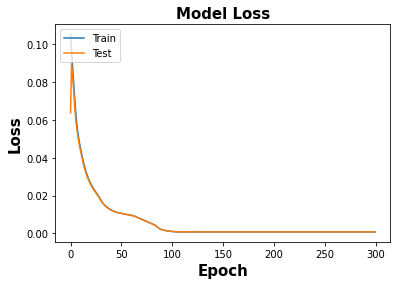

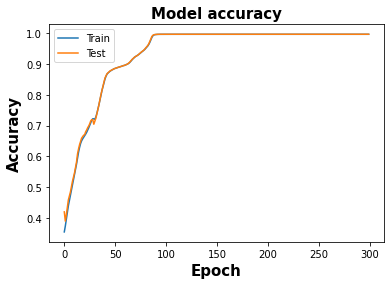

In [30]:
# summarize history for loss
plt.plot(model_fit8.history['loss'])
plt.plot(model_fit8.history['val_loss'])
plt.title('Model Loss',fontweight ='bold',fontsize = 15)
plt.ylabel('Loss',fontweight ='bold',fontsize = 15)
plt.xlabel('Epoch',fontweight ='bold',fontsize = 15)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(model_fit8.history['accuracy'])
plt.plot(model_fit8.history['val_accuracy'])
plt.title('Model accuracy',fontweight ='bold',fontsize = 15)
plt.ylabel('Accuracy',fontweight ='bold',fontsize = 15)
plt.xlabel('Epoch',fontweight ='bold',fontsize = 15)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.25, random_state=42)

y_test_pred=loaded_model.predict(x_test)
y_test_pred